In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
PREC = 6
title_prop = {"font":"serif","color":"blue","size":20}
label_prop = {"font":"serif","color":"darkred","size":15}

In [4]:
df = pd.read_csv("data/downsample.csv")

In [5]:
df["reordered"].value_counts()

0    100000
1    100000
Name: reordered, dtype: int64

In [6]:
len(df)

200000

In [211]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [213]:
df.drop(["Unnamed: 0.1"],axis=1,inplace=True)

In [214]:
df.head()

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,163387,146362,37654,36,16,13,0,Butter with Canola Oil Spread,butter,dairy eggs,prior,17,1,18,7.0
1,105630,2913721,34166,21,16,6,0,Organic Shredded Parmesan,packaged cheese,dairy eggs,prior,19,2,12,4.0
2,166693,328552,3494,94,7,24,0,Matcha Powder,tea,beverages,prior,44,2,11,5.0
3,205475,3231874,10998,128,3,4,0,Yellow Corn Organic Tortillas,tortillas flat bread,bakery,prior,1,0,16,0.0
4,62157,91244,43129,5,13,18,0,Panko Bread Crumbs,marinades meat preparation,pantry,prior,8,2,21,6.0


In [9]:
df.columns

Index(['Unnamed: 0.1', 'user_id', 'order_id', 'product_id', 'aisle_id',
       'department_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle', 'department', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [10]:
df["aisle_id"].unique()

array([ 36,  21,  94, 128,   5, 105,  91, 123,  31,  59, 100,  17,  24,
       112,  83,  37,  55,  23,  97,  68,  92,  84,  16,  13, 120,  72,
        43,   8,  61,  69,  87, 108, 131,  77,  71,  58,  99, 116, 127,
        78, 130,  98, 115, 106,  66,  49,  52,  85,  50,  28,  32,  26,
         4,  48, 129,  63, 117,  45, 107,  30,  81, 101,   1,  19, 104,
         2,  14,  96,  88,  67,  54,  41, 125, 114,  51,  86,  27,  75,
        33,  93,  70, 121, 132,  89,  38,  64,   3,   9, 110,  47,  57,
        79,  90,  12, 119,  53,  46,  40,  29,  42,  60, 111,  20,  22,
        25, 103,  95,   7,  65,  15,  11, 124,  80,  74,  73,  56,   6,
       118, 109,  39,  35, 102,  62,  18, 122,  44,  34,  10,  76, 133,
       126, 113,  82, 134])

In [11]:
df.head()

,Unnamed: 0.1,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1447332,163387,146362,37654,36,16,13,0,Butter with Canola Oil Spread,butter,dairy eggs,prior,17,1,18,7.0
1,28808750,105630,2913721,34166,21,16,6,0,Organic Shredded Parmesan,packaged cheese,dairy eggs,prior,19,2,12,4.0
2,3246804,166693,328552,3494,94,7,24,0,Matcha Powder,tea,beverages,prior,44,2,11,5.0
3,31948929,205475,3231874,10998,128,3,4,0,Yellow Corn Organic Tortillas,tortillas flat bread,bakery,prior,1,0,16,0.0
4,898554,62157,91244,43129,5,13,18,0,Panko Bread Crumbs,marinades meat preparation,pantry,prior,8,2,21,6.0


In [12]:
#EDA

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
#Univariate Analysis

/tmp/ipykernel_696242/308556941.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


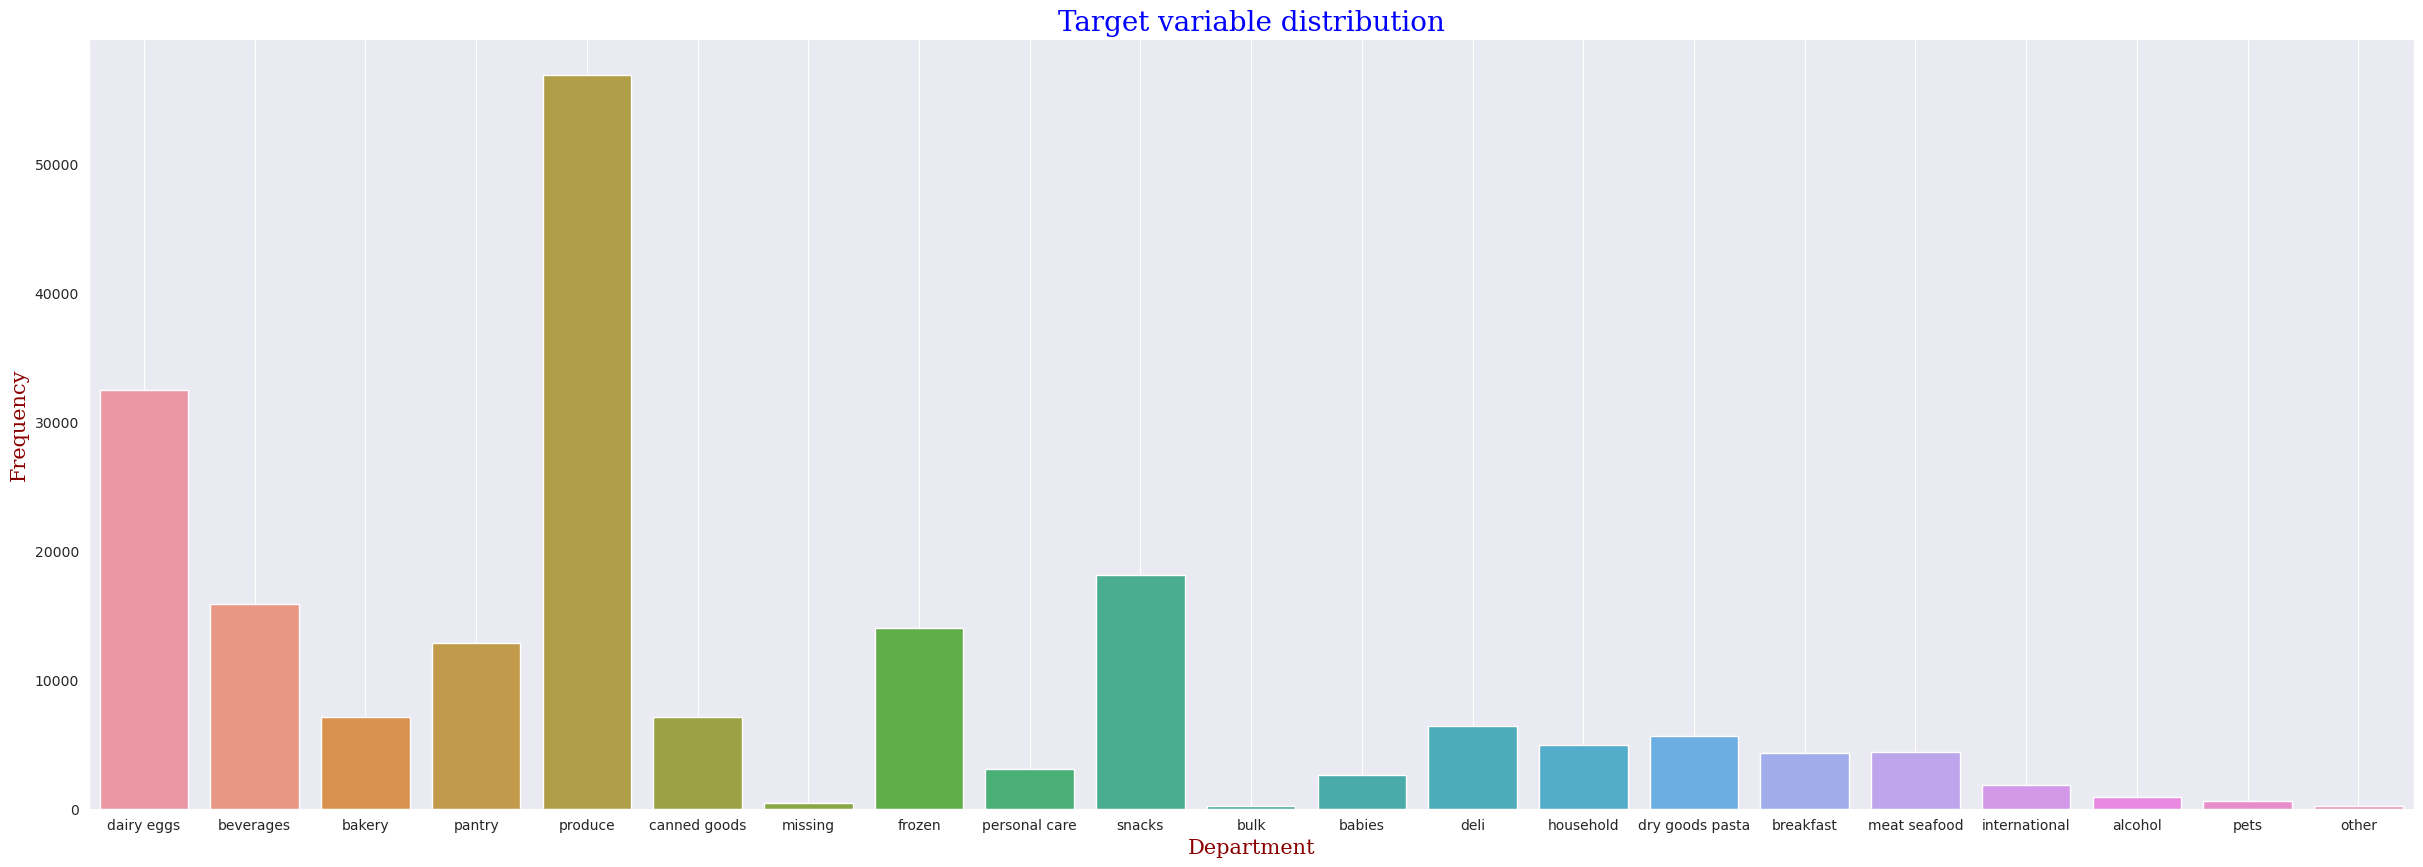

In [19]:
#target variable distribution
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df,x="department",ax=ax)
ax.set_xlabel("Department",fontdict=label_prop)
ax.set_ylabel("Frequency",fontdict=label_prop)
ax.set_title("Target variable distribution",fontdict=title_prop)
ax.grid()
fig.show()

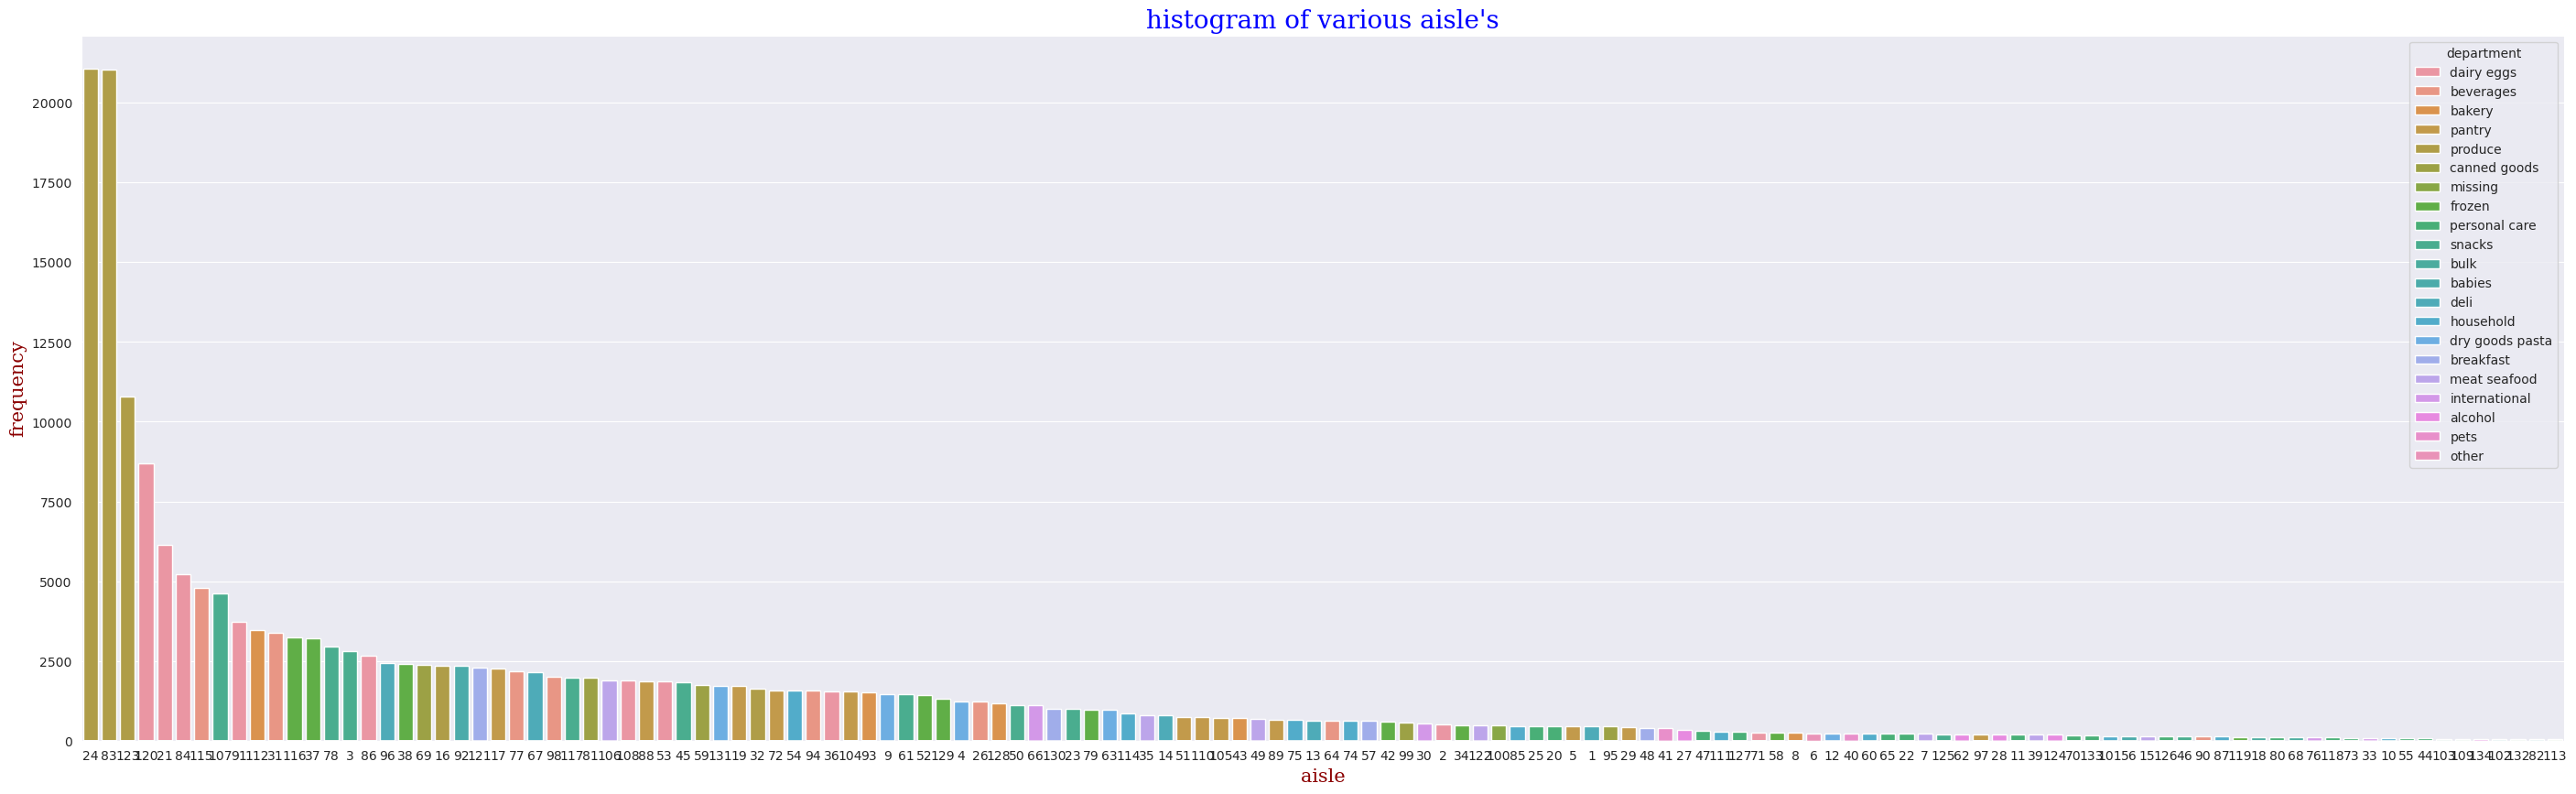

In [24]:
#number of aisles in the dataset
plt.figure(figsize=(35,10))
sns.countplot(df,x="aisle_id",width=0.8,hue="department",dodge=False,order=df["aisle_id"].value_counts().index)
plt.title("histogram of various aisle's",fontdict=title_prop)
plt.xlabel("aisle",fontdict=label_prop)
plt.ylabel("frequency",fontdict=label_prop)
plt.show()

In [25]:
#number of orders by the user

In [26]:
df

,Unnamed: 0.1,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1447332,163387,146362,37654,36,16,13,0,Butter with Canola Oil Spread,butter,dairy eggs,prior,17,1,18,7.0
1,28808750,105630,2913721,34166,21,16,6,0,Organic Shredded Parmesan,packaged cheese,dairy eggs,prior,19,2,12,4.0
2,3246804,166693,328552,3494,94,7,24,0,Matcha Powder,tea,beverages,prior,44,2,11,5.0
3,31948929,205475,3231874,10998,128,3,4,0,Yellow Corn Organic Tortillas,tortillas flat bread,bakery,prior,1,0,16,0.0
4,898554,62157,91244,43129,5,13,18,0,Panko Bread Crumbs,marinades meat preparation,pantry,prior,8,2,21,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,21754089,88598,2200706,43928,21,16,2,1,Creamy Swiss Original Wedges Cheese,packaged cheese,dairy eggs,prior,6,4,15,9.0
199996,28379210,74157,2870043,4920,123,4,12,1,Seedless Red Grapes,packaged vegetables fruits,produce,prior,14,6,21,7.0
199997,15538025,191770,1572086,13884,93,3,6,1,Chocolate Chip Muffins,breakfast bakery,bakery,prior,11,0,14,19.0
199998,644168,8458,65289,31717,16,4,2,1,Organic Cilantro,fresh herbs,produce,prior,9,3,8,8.0


In [61]:
temp_ = df.groupby(["user_id"])["order_id"].agg(lambda x:len(x.unique())).reset_index(name="order_count")

In [62]:
temp_

,user_id,order_count
0,1,1
1,3,1
2,7,2
3,10,2
4,12,1
...,...,...
98662,206202,1
98663,206205,1
98664,206206,2
98665,206208,5


In [63]:
temp_

,user_id,order_count
0,1,1
1,3,1
2,7,2
3,10,2
4,12,1
...,...,...
98662,206202,1
98663,206205,1
98664,206206,2
98665,206208,5


/tmp/ipykernel_696242/1612910341.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


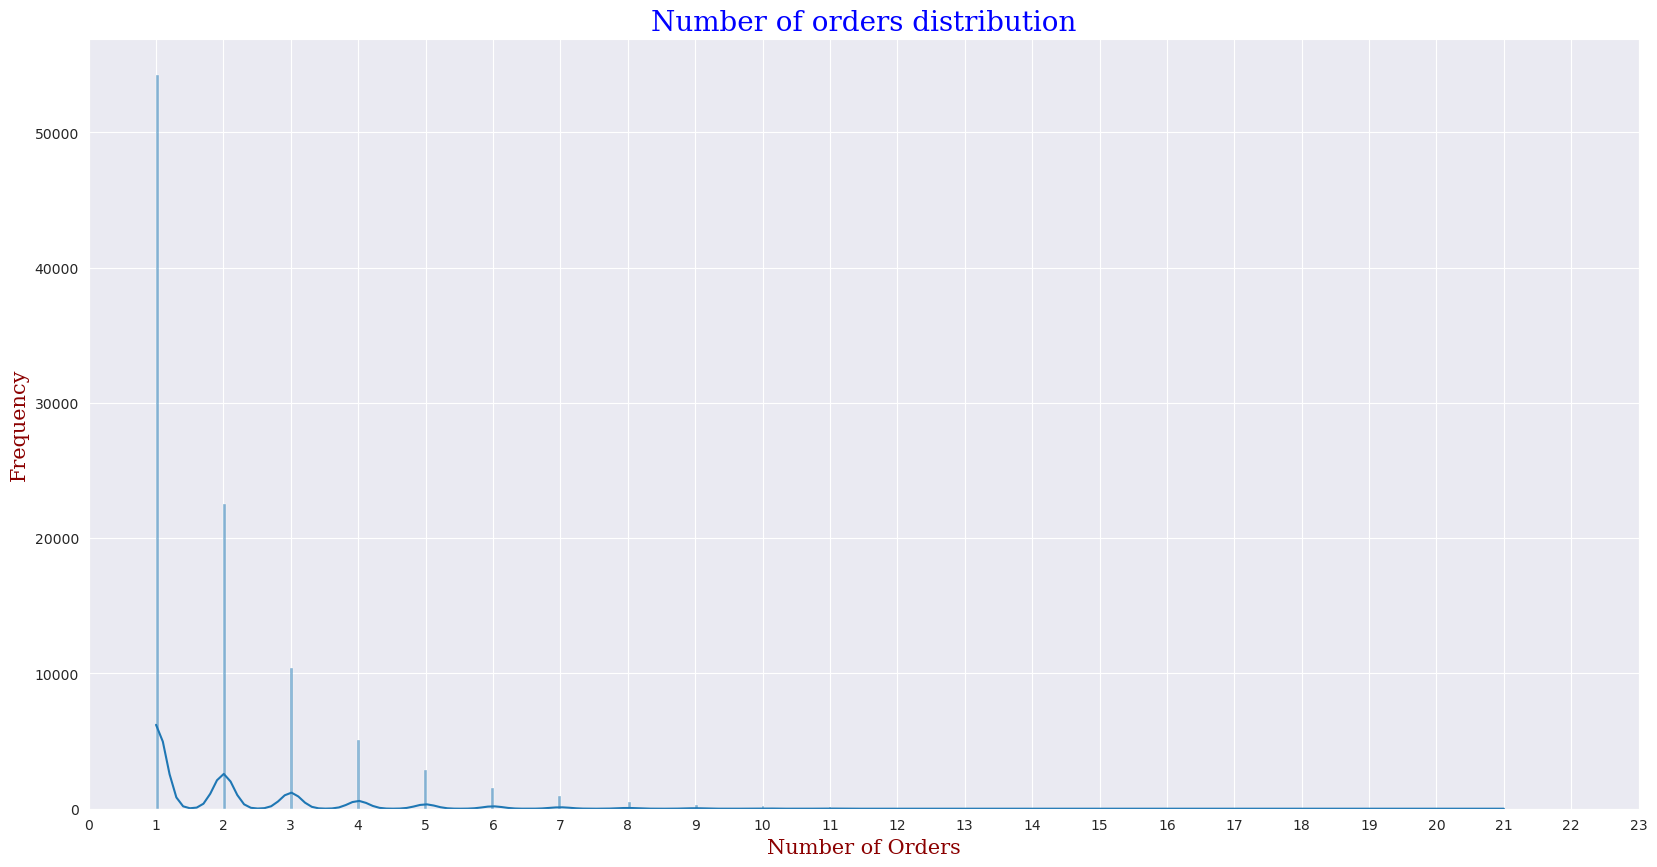

In [66]:
fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.histplot(data=temp_,x="order_count",ax=ax,kde=True) #kde_kws not working properly
plt.xticks(list(range(0,24,1)))
ax.set_xlabel("Number of Orders",fontdict=label_prop)
ax.set_ylabel("Frequency",fontdict=label_prop)
ax.set_title("Number of orders distribution",fontdict=title_prop)
fig.show()

Most people in the dataset ordered between 40 and 80 items in our dataset

In [67]:
# freequently reordered items

In [68]:
df.head()

,Unnamed: 0.1,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1447332,163387,146362,37654,36,16,13,0,Butter with Canola Oil Spread,butter,dairy eggs,prior,17,1,18,7.0
1,28808750,105630,2913721,34166,21,16,6,0,Organic Shredded Parmesan,packaged cheese,dairy eggs,prior,19,2,12,4.0
2,3246804,166693,328552,3494,94,7,24,0,Matcha Powder,tea,beverages,prior,44,2,11,5.0
3,31948929,205475,3231874,10998,128,3,4,0,Yellow Corn Organic Tortillas,tortillas flat bread,bakery,prior,1,0,16,0.0
4,898554,62157,91244,43129,5,13,18,0,Panko Bread Crumbs,marinades meat preparation,pantry,prior,8,2,21,6.0


In [69]:
temp_ = df[df["reordered"] == 1]["product_name"].value_counts().reset_index()

In [70]:
temp_

,index,product_name
0,Banana,2053
1,Bag of Organic Bananas,1641
2,Organic Strawberries,1042
3,Organic Baby Spinach,1002
4,Organic Hass Avocado,826
...,...,...
13828,Chocolate Cream Pie,1
13829,Organic Vanilla Raw Fit Protein for Weight Loss,1
13830,Ham And Cheese Style Pocket,1
13831,Dill Rye Bread,1


In [71]:
temp_.columns = ["product_name","count"]

In [72]:
temp_["product_name"].nunique()

13833

In [73]:
temp_

,product_name,count
0,Banana,2053
1,Bag of Organic Bananas,1641
2,Organic Strawberries,1042
3,Organic Baby Spinach,1002
4,Organic Hass Avocado,826
...,...,...
13828,Chocolate Cream Pie,1
13829,Organic Vanilla Raw Fit Protein for Weight Loss,1
13830,Ham And Cheese Style Pocket,1
13831,Dill Rye Bread,1


In [74]:
sum_count = temp_["count"].sum()
temp_ = temp_.sort_values(by="count",key=lambda x:-1*x)
temp_["reorder"] = (temp_["count"]/sum_count)

In [75]:
temp_["reorder"] = temp_["reorder"]*100

In [76]:
temp_

,product_name,count,reorder
0,Banana,2053,2.053
1,Bag of Organic Bananas,1641,1.641
2,Organic Strawberries,1042,1.042
3,Organic Baby Spinach,1002,1.002
4,Organic Hass Avocado,826,0.826
...,...,...,...
9866,Cantaloupe Spears,1,0.001
9865,Oats Banana Maple Blended Low-Fat Greek Yogurt,1,0.001
9864,Refill Infant Milk-Based with Iron 16.6 oz Pou...,1,0.001
9873,Truffle Mousse,1,0.001


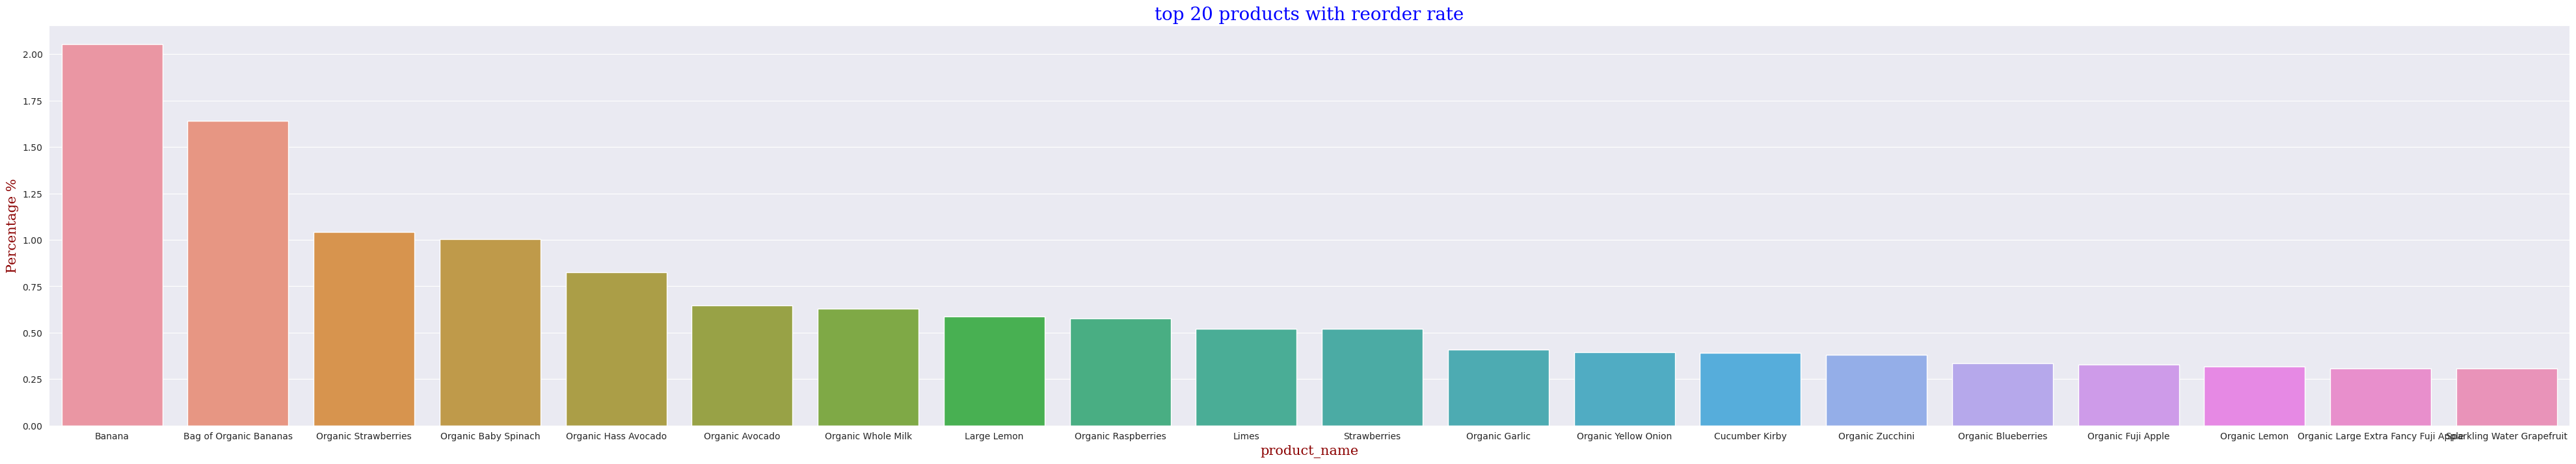

In [77]:
plt.figure(figsize=(50,8))
sns.barplot(data=temp_.iloc[:20],x="product_name",y="reorder")
plt.xlabel("product_name",fontdict=label_prop)
plt.ylabel("Percentage %",fontdict=label_prop)
plt.title("top 20 products with reorder rate",fontdict=title_prop)
plt.show()

In [96]:
# products sold in aisle reordered vs not reordered
#fig,ax = plt.subplots(1,2)
temp_1 = df[df["reordered"] == 1]["aisle"].value_counts().reset_index()
temp_1.columns = ["aisle","count"]
temp_1 = temp_1.sort_values(by="count",ascending=False)
temp_1 = temp_1.set_index("aisle")
temp_k = temp_1.iloc[:20].__deepcopy__()
temp_k["count"] = temp_k["count"]/temp_k["count"].sum()
temp_k = list(temp_k["count"])


In [97]:
# products sold in aisle reordered vs not reordered
#fig,ax = plt.subplots(1,2)
temp_2 = df[df["reordered"] == 0]["aisle"].value_counts().reset_index()
temp_2.columns = ["aisle","count"]
temp_2 = temp_2.sort_values(by="count",ascending=False)
temp_2 = temp_2.set_index("aisle")
temp_k2 = temp_2.iloc[:20].__deepcopy__()
temp_k2["count"] = temp_k2["count"]/temp_k2["count"].sum()
temp_k2 = list(temp_k2["count"])

In [98]:
print(len(temp_k))
print(len(temp_k2))

20
20


/tmp/ipykernel_696242/560615049.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


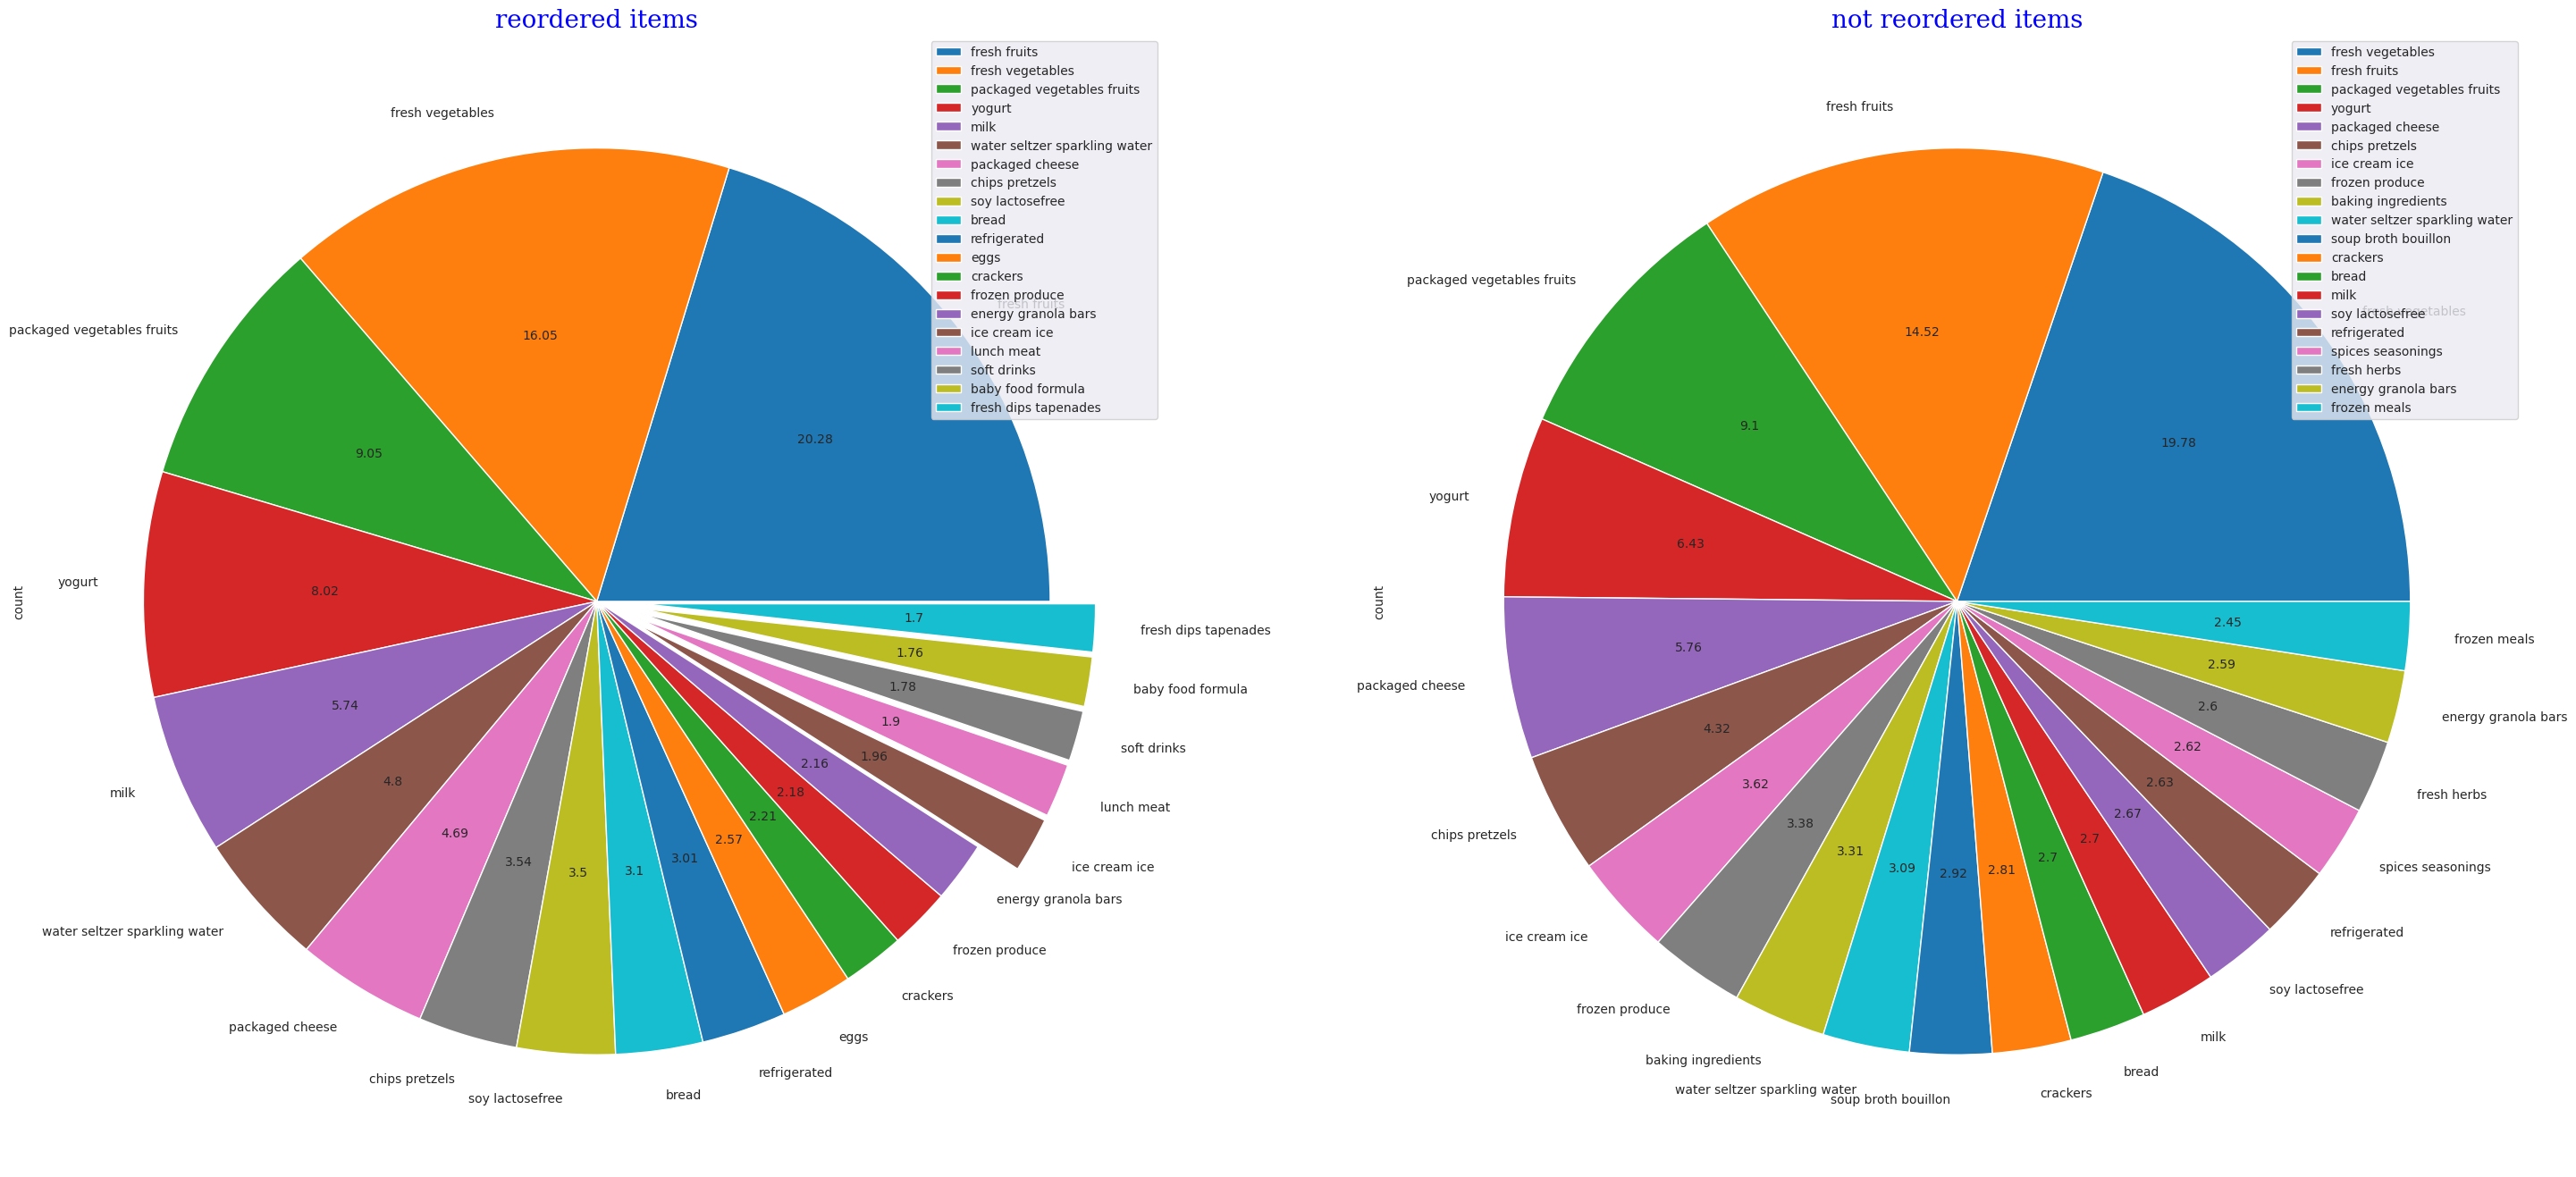

<Figure size 640x480 with 0 Axes>

In [102]:
explode_ = []
for i in range(len(temp_k)):
    if temp_k[i] < 0.02:
        explode_.append(0.1)
    else:
        explode_.append(0)
font_pie = {"size": 10}
fig,ax = plt.subplots(1,2,figsize=(36,18))
plt.figure()
temp_1.sort_values(by="count",ascending=False).iloc[:20].plot(
    kind="pie",
    y="count",
    autopct=lambda x:np.round(x,2),
    explode=tuple(explode_),
    textprops=font_pie,
    ax = ax[0],
)
ax[0].legend(loc="upper right")
ax[0].set_title("reordered items",fontdict=title_prop)
explode_ = []
for i in range(len(temp_k2)):
    if temp_k2[i] < 0.02:
        explode_.append(0.1)
    else:
        explode_.append(0)
font_pie = {"size": 10}
temp_2.sort_values(by="count",ascending=False).iloc[:20].plot(
    kind="pie",
    y="count",
    autopct=lambda x:np.round(x,2),
    explode=tuple(explode_),
    textprops=font_pie,
    ax = ax[1],
)
ax[1].legend(loc="upper right")
ax[1].set_title("not reordered items",fontdict=title_prop)
fig.show()

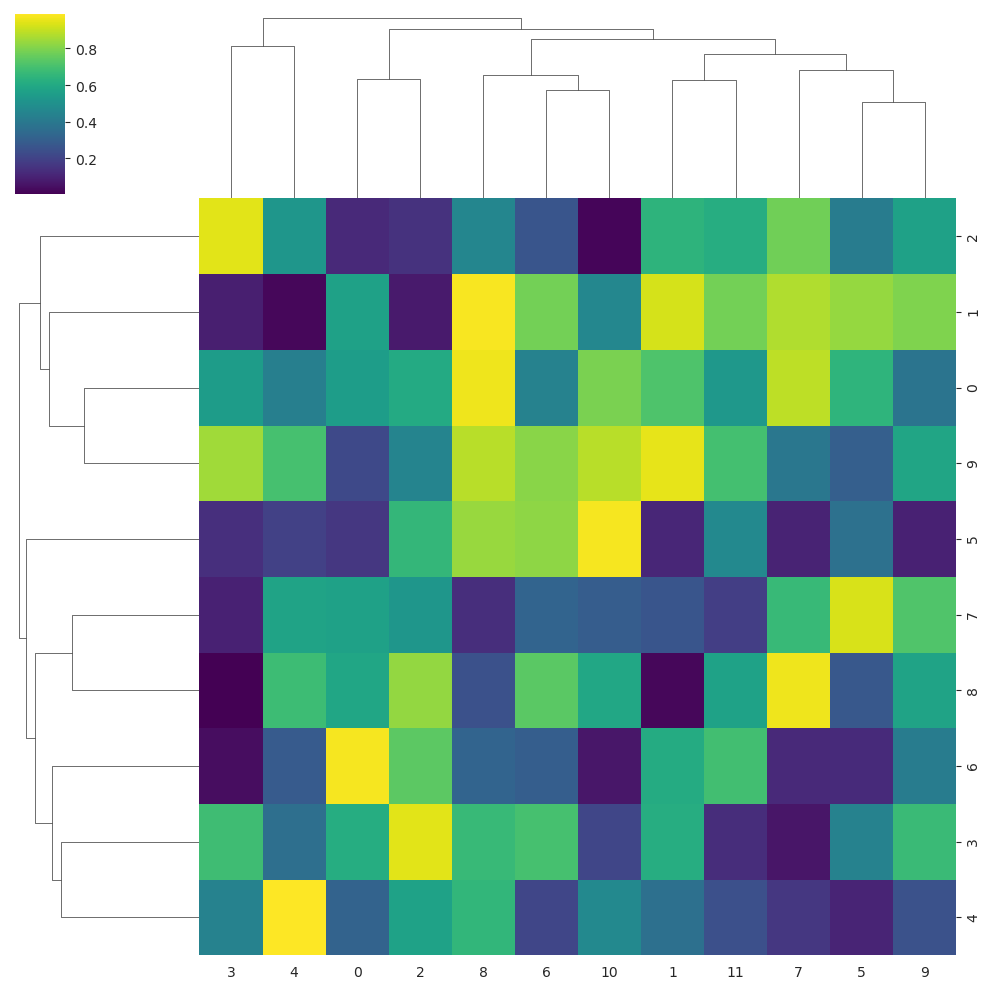

In [100]:
import seaborn as sns
import numpy as np

# Generate a random dataset
np.random.seed(0)
data = np.random.rand(10, 12)

# Create a clustered heatmap using clustermap
sns.clustermap(data, cmap="viridis")

# Display the plot
plt.show()

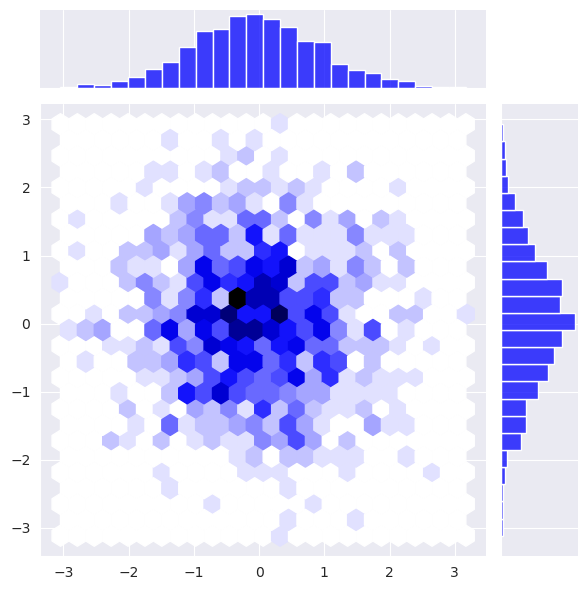

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# Create a hexbin plot
sns.jointplot(x=x, y=y, kind='hex', color='blue')

# Display the plot
plt.show()

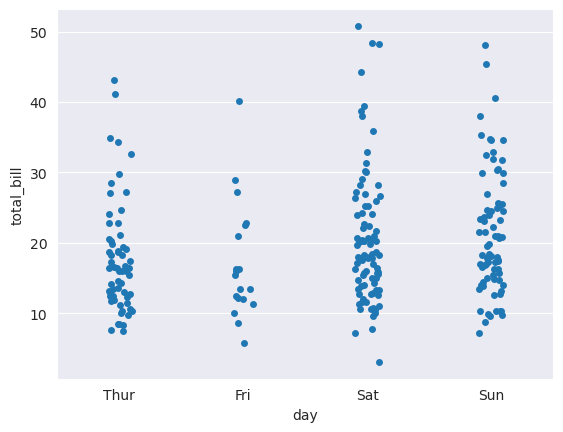

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data
data = sns.load_dataset("tips")

# Create a strip plot
sns.stripplot(x="day", y="total_bill", data=data, jitter=True)

# Display the plot
plt.show()


In [104]:
df.drop(["Unnamed: 0.1"],axis=1,inplace=True)

In [105]:
df

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,163387,146362,37654,36,16,13,0,Butter with Canola Oil Spread,butter,dairy eggs,prior,17,1,18,7.0
1,105630,2913721,34166,21,16,6,0,Organic Shredded Parmesan,packaged cheese,dairy eggs,prior,19,2,12,4.0
2,166693,328552,3494,94,7,24,0,Matcha Powder,tea,beverages,prior,44,2,11,5.0
3,205475,3231874,10998,128,3,4,0,Yellow Corn Organic Tortillas,tortillas flat bread,bakery,prior,1,0,16,0.0
4,62157,91244,43129,5,13,18,0,Panko Bread Crumbs,marinades meat preparation,pantry,prior,8,2,21,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,88598,2200706,43928,21,16,2,1,Creamy Swiss Original Wedges Cheese,packaged cheese,dairy eggs,prior,6,4,15,9.0
199996,74157,2870043,4920,123,4,12,1,Seedless Red Grapes,packaged vegetables fruits,produce,prior,14,6,21,7.0
199997,191770,1572086,13884,93,3,6,1,Chocolate Chip Muffins,breakfast bakery,bakery,prior,11,0,14,19.0
199998,8458,65289,31717,16,4,2,1,Organic Cilantro,fresh herbs,produce,prior,9,3,8,8.0


In [128]:
order_dow_count = df["order_dow"].value_counts().reset_index().sort_values(by="index")

In [129]:
order_dow_count

,index,order_dow
0,0,38521
1,1,34581
4,2,25689
5,3,23809
6,4,23537
3,5,25985
2,6,27878


/tmp/ipykernel_696242/2272953221.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


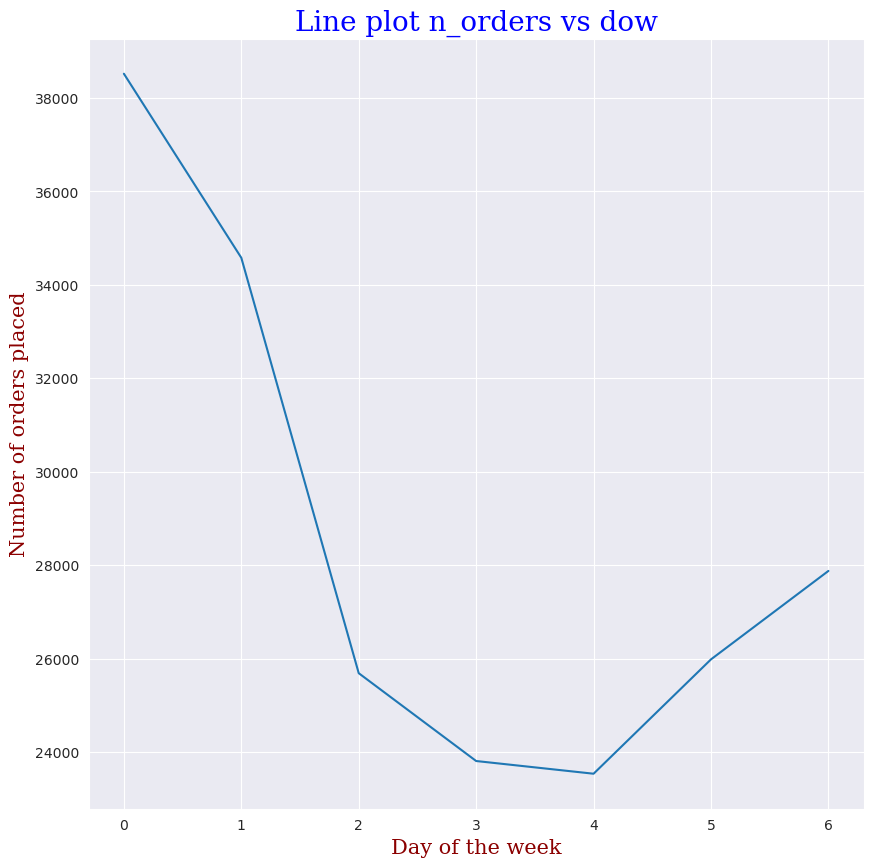

In [133]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.plot(order_dow_count["index"],order_dow_count["order_dow"])
#ax.set_xticks(["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])
ax.set_xlabel("Day of the week",fontdict=label_prop)
ax.set_ylabel("Number of orders placed",fontdict=label_prop)
ax.set_title("Line plot n_orders vs dow",fontdict=title_prop)
fig.show()

In [151]:
df

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,163387,146362,37654,36,16,13,0,Butter with Canola Oil Spread,butter,dairy eggs,prior,17,1,18,7.0
1,105630,2913721,34166,21,16,6,0,Organic Shredded Parmesan,packaged cheese,dairy eggs,prior,19,2,12,4.0
2,166693,328552,3494,94,7,24,0,Matcha Powder,tea,beverages,prior,44,2,11,5.0
3,205475,3231874,10998,128,3,4,0,Yellow Corn Organic Tortillas,tortillas flat bread,bakery,prior,1,0,16,0.0
4,62157,91244,43129,5,13,18,0,Panko Bread Crumbs,marinades meat preparation,pantry,prior,8,2,21,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,88598,2200706,43928,21,16,2,1,Creamy Swiss Original Wedges Cheese,packaged cheese,dairy eggs,prior,6,4,15,9.0
199996,74157,2870043,4920,123,4,12,1,Seedless Red Grapes,packaged vegetables fruits,produce,prior,14,6,21,7.0
199997,191770,1572086,13884,93,3,6,1,Chocolate Chip Muffins,breakfast bakery,bakery,prior,11,0,14,19.0
199998,8458,65289,31717,16,4,2,1,Organic Cilantro,fresh herbs,produce,prior,9,3,8,8.0


In [176]:
temp_1 = df[df["reordered"] == 0]["product_name"].value_counts().reset_index().sort_values(by="product_name",ascending=False).iloc[:20].set_index(["index"]).to_dict()
temp_2 = df[df["reordered"] == 1]["product_name"].value_counts().reset_index().sort_values(by="product_name",ascending=False).iloc[:20].set_index(["index"]).to_dict()

In [183]:
temp_1 = temp_1["product_name"]
temp_2 = temp_2["product_name"]

In [184]:
temp_2.items()

dict_items([('Banana', 2053), ('Bag of Organic Bananas', 1641), ('Organic Strawberries', 1042), ('Organic Baby Spinach', 1002), ('Organic Hass Avocado', 826), ('Organic Avocado', 646), ('Organic Whole Milk', 629), ('Large Lemon', 588), ('Organic Raspberries', 576), ('Limes', 520), ('Strawberries', 520), ('Organic Garlic', 408), ('Organic Yellow Onion', 395), ('Cucumber Kirby', 391), ('Organic Zucchini', 380), ('Organic Blueberries', 335), ('Organic Fuji Apple', 329), ('Organic Lemon', 319), ('Organic Large Extra Fancy Fuji Apple', 308), ('Sparkling Water Grapefruit', 306)])

In [185]:
temp_final = pd.DataFrame.from_dict({"product_name":temp_1.keys(),"ordered":temp_1.values(),"reordered":temp_2.values()})

In [189]:
temp_final = temp_final.set_index(["product_name"])
temp_final

,ordered,reordered
product_name,,
Banana,561,2053
Organic Strawberries,487,1641
Bag of Organic Bananas,454,1042
Organic Baby Spinach,415,1002
Limes,342,826
Strawberries,340,646
Large Lemon,338,629
Organic Hass Avocado,332,588
Organic Blueberries,301,576


Text(0.5, 1.0, 'Barplot Group for product name')

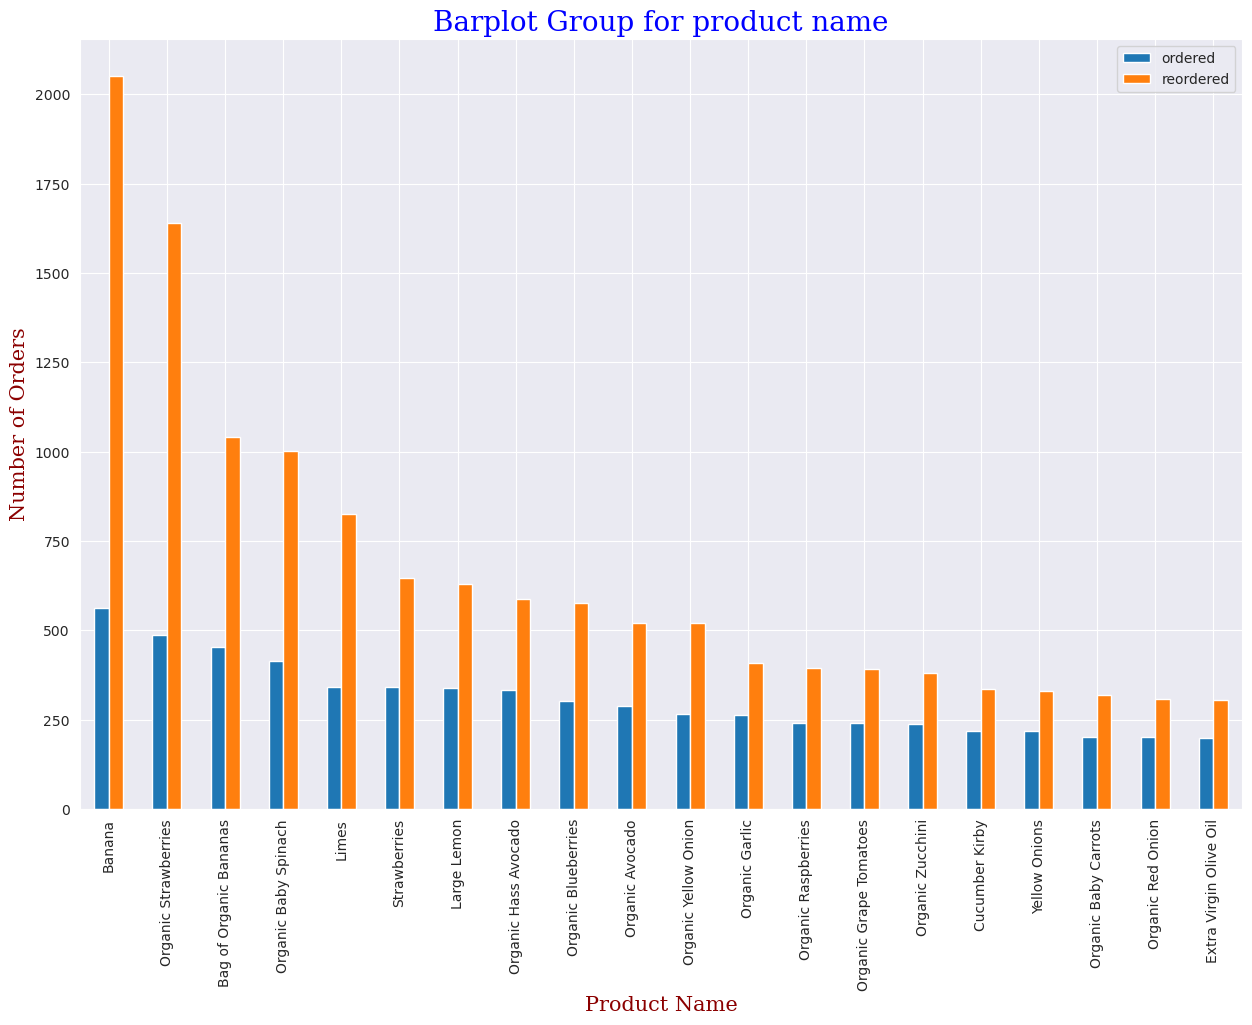

In [192]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
temp_final.plot(kind="bar",ax=ax)
ax.set_xlabel("Product Name",fontdict=label_prop)
ax.set_ylabel("Number of Orders",fontdict=label_prop)
ax.set_title("Barplot Group for product name",fontdict=title_prop)

In [194]:
temp_1 = df[df["reordered"] == 0]["order_dow"].value_counts().reset_index().sort_values(by="order_dow",ascending=False).set_index(["index"]).to_dict()
temp_2 = df[df["reordered"] == 1]["order_dow"].value_counts().reset_index().sort_values(by="order_dow",ascending=False).set_index(["index"]).to_dict()

In [196]:
temp_1 = temp_1["order_dow"]
temp_2 = temp_2["order_dow"]

In [197]:
temp_final = pd.DataFrame.from_dict({"order_dow":temp_1.keys(),"ordered":temp_1.values(),"reordered":temp_2.values()})

/tmp/ipykernel_696242/3303637070.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


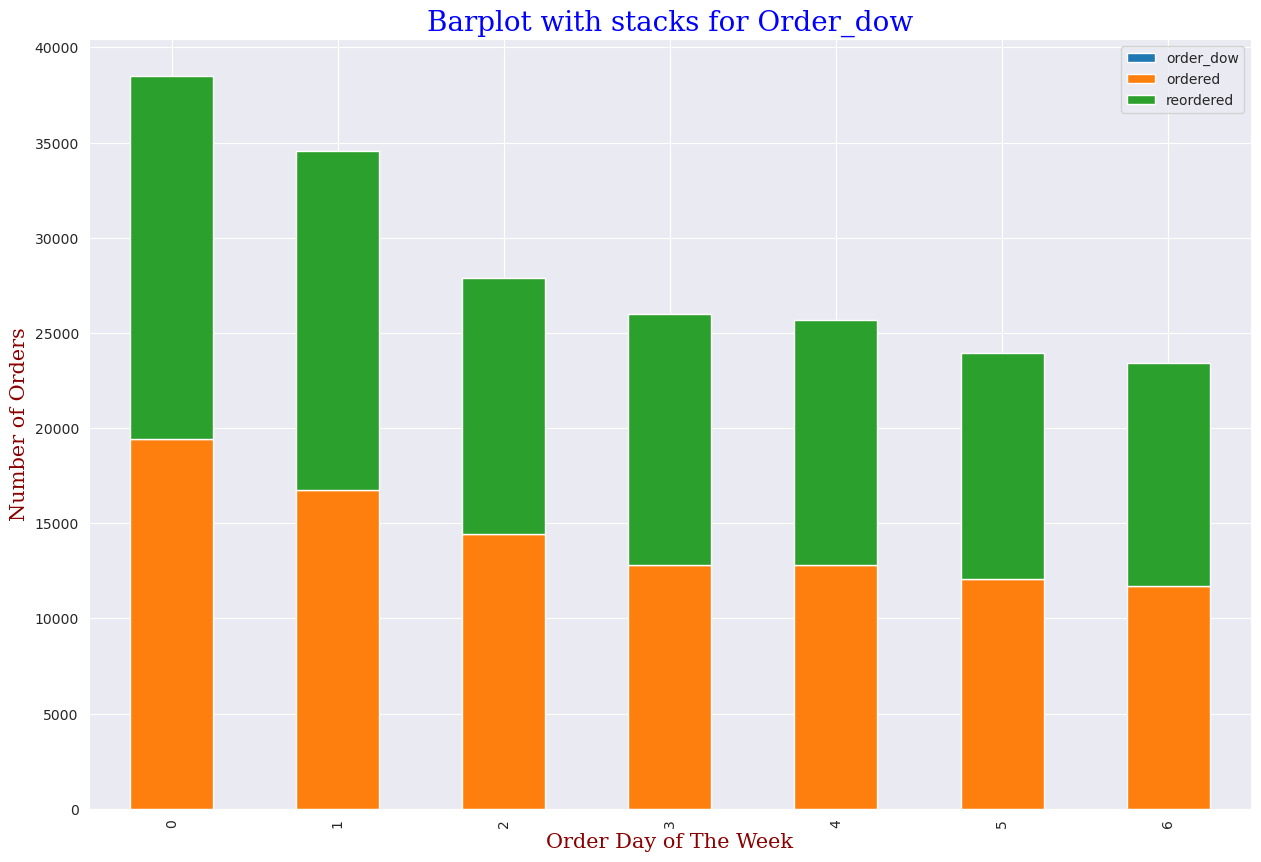

In [200]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
temp_final.plot(kind="bar",stacked=True,ax=ax)
ax.set_xlabel("Order Day of The Week",fontdict=label_prop)
ax.set_ylabel("Number of Orders",fontdict=label_prop)
ax.set_title("Barplot with stacks for Order_dow",fontdict=title_prop)
fig.show()

/tmp/ipykernel_696242/419171757.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["order_hour_of_day"],ax=ax)
/tmp/ipykernel_696242/419171757.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


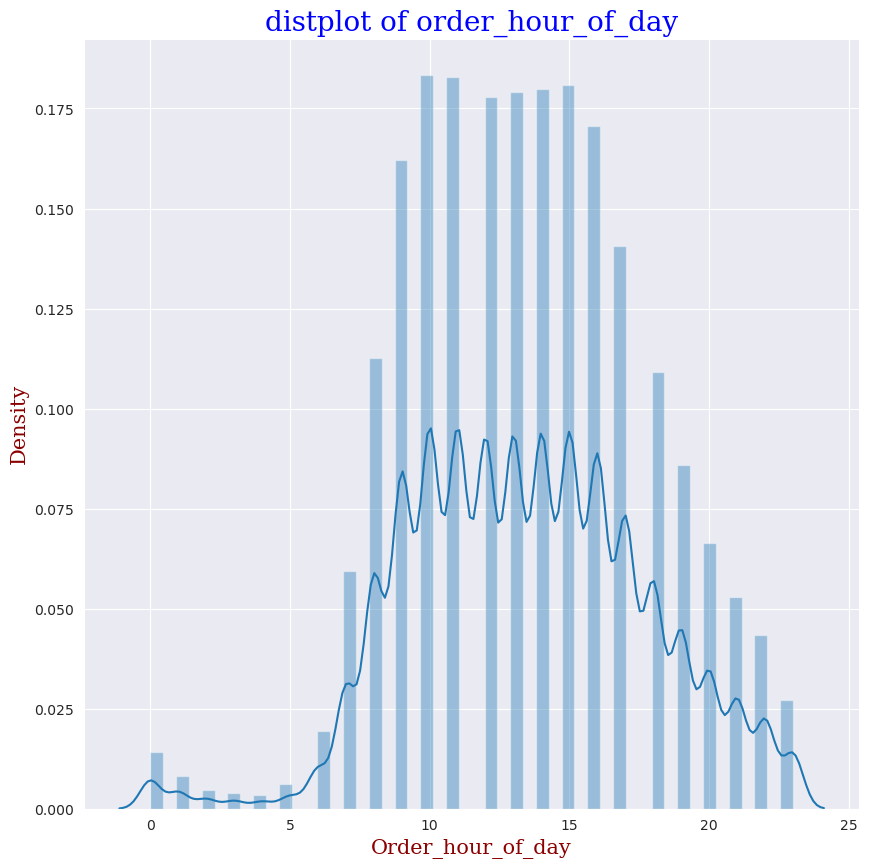

In [204]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.distplot(df["order_hour_of_day"],ax=ax)
ax.set_title("distplot of order_hour_of_day",fontdict=title_prop)
ax.set_xlabel("Order_hour_of_day",fontdict=label_prop)
ax.set_ylabel("Density",fontdict=label_prop)
fig.show()

In [223]:
dict_ = {"order_dow":list(df["order_dow"].unique())}
for day in list(df["order_dow"].unique()): 
    for hour in list(df["order_hour_of_day"].unique()):
        if hour in dict_:
            temp_ = df[df["order_hour_of_day"] == hour]
            dict_[hour].append(len(temp_[temp_["order_hour_of_day"] == hour]))
        else:
            temp_ = df[df["order_hour_of_day"] == hour]
            dict_[hour] = [len(temp_[temp_["order_hour_of_day"] == hour])]

In [224]:
print(dict_)

{'order_dow': [1, 2, 0, 5, 4, 6, 3], 18: [10044, 10044, 10044, 10044, 10044, 10044, 10044], 12: [16363, 16363, 16363, 16363, 16363, 16363, 16363], 11: [16813, 16813, 16813, 16813, 16813, 16813, 16813], 16: [15700, 15700, 15700, 15700, 15700, 15700, 15700], 21: [4865, 4865, 4865, 4865, 4865, 4865, 4865], 15: [16636, 16636, 16636, 16636, 16636, 16636, 16636], 14: [16553, 16553, 16553, 16553, 16553, 16553, 16553], 17: [12935, 12935, 12935, 12935, 12935, 12935, 12935], 8: [10366, 10366, 10366, 10366, 10366, 10366, 10366], 10: [16861, 16861, 16861, 16861, 16861, 16861, 16861], 9: [14917, 14917, 14917, 14917, 14917, 14917, 14917], 20: [6101, 6101, 6101, 6101, 6101, 6101, 6101], 7: [5460, 5460, 5460, 5460, 5460, 5460, 5460], 13: [16468, 16468, 16468, 16468, 16468, 16468, 16468], 2: [441, 441, 441, 441, 441, 441, 441], 22: [3990, 3990, 3990, 3990, 3990, 3990, 3990], 19: [7913, 7913, 7913, 7913, 7913, 7913, 7913], 6: [1789, 1789, 1789, 1789, 1789, 1789, 1789], 23: [2495, 2495, 2495, 2495, 2495,

In [227]:
df_h = pd.DataFrame.from_dict(dict_) 

<Axes: >

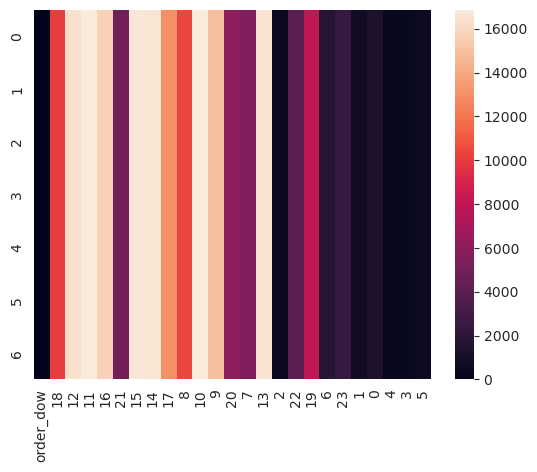

In [228]:
sns.heatmap(df_h)

In [229]:
df.columns

Index(['user_id', 'order_id', 'product_id', 'aisle_id', 'department_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle', 'department',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [242]:
data = df["aisle_id"].value_counts().reset_index()
data.columns = ["aisle_id","counts"]
data = data.sort_values("counts",ascending=False)

In [252]:
cart_size = df["order_id"].value_counts().reset_index()

In [256]:
cart_size["order_id"].value_counts()

1    183251
2      7901
3       301
4        11
Name: order_id, dtype: int64

In [260]:
df

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,163387,146362,37654,36,16,13,0,Butter with Canola Oil Spread,butter,dairy eggs,prior,17,1,18,7.0
1,105630,2913721,34166,21,16,6,0,Organic Shredded Parmesan,packaged cheese,dairy eggs,prior,19,2,12,4.0
2,166693,328552,3494,94,7,24,0,Matcha Powder,tea,beverages,prior,44,2,11,5.0
3,205475,3231874,10998,128,3,4,0,Yellow Corn Organic Tortillas,tortillas flat bread,bakery,prior,1,0,16,0.0
4,62157,91244,43129,5,13,18,0,Panko Bread Crumbs,marinades meat preparation,pantry,prior,8,2,21,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,88598,2200706,43928,21,16,2,1,Creamy Swiss Original Wedges Cheese,packaged cheese,dairy eggs,prior,6,4,15,9.0
199996,74157,2870043,4920,123,4,12,1,Seedless Red Grapes,packaged vegetables fruits,produce,prior,14,6,21,7.0
199997,191770,1572086,13884,93,3,6,1,Chocolate Chip Muffins,breakfast bakery,bakery,prior,11,0,14,19.0
199998,8458,65289,31717,16,4,2,1,Organic Cilantro,fresh herbs,produce,prior,9,3,8,8.0


In [276]:
df_1 = df["aisle_id"].value_counts().reset_index().sort_values(by="aisle_id",ascending=False).iloc[:20].to_dict()["index"].values()

In [277]:
df_1

dict_values([24, 83, 123, 120, 21, 84, 115, 107, 91, 112, 31, 116, 37, 78, 3, 86, 96, 38, 69, 16])

In [280]:
new_df = None
for val in list(df_1):
    temp_ = df[df["aisle_id"]== val]
    if new_df is None:
        new_df = temp_
    else:
        new_df = pd.concat([temp_,new_df],axis=0)
new_df
        

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
27,44575,161994,31717,16,4,7,0,Organic Cilantro,fresh herbs,produce,prior,2,4,16,11.0
160,199326,1592674,28842,16,4,6,0,Bunched Cilantro,fresh herbs,produce,prior,3,5,15,6.0
215,56395,2067131,38266,16,4,15,0,Fresh Basil,fresh herbs,produce,prior,2,1,13,30.0
478,53718,937584,43789,16,4,3,0,Organic Basil,fresh herbs,produce,prior,3,6,18,6.0
538,108292,3309637,38266,16,4,10,0,Fresh Basil,fresh herbs,produce,prior,17,6,16,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199954,113071,950276,24852,24,4,2,1,Banana,fresh fruits,produce,prior,8,1,15,3.0
199965,55688,1788834,24852,24,4,14,1,Banana,fresh fruits,produce,prior,2,3,12,30.0
199971,93490,2121263,13176,24,4,5,1,Bag of Organic Bananas,fresh fruits,produce,prior,5,1,9,10.0
199974,63789,1357494,28204,24,4,8,1,Organic Fuji Apple,fresh fruits,produce,prior,97,2,20,5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_696242/1751689963.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


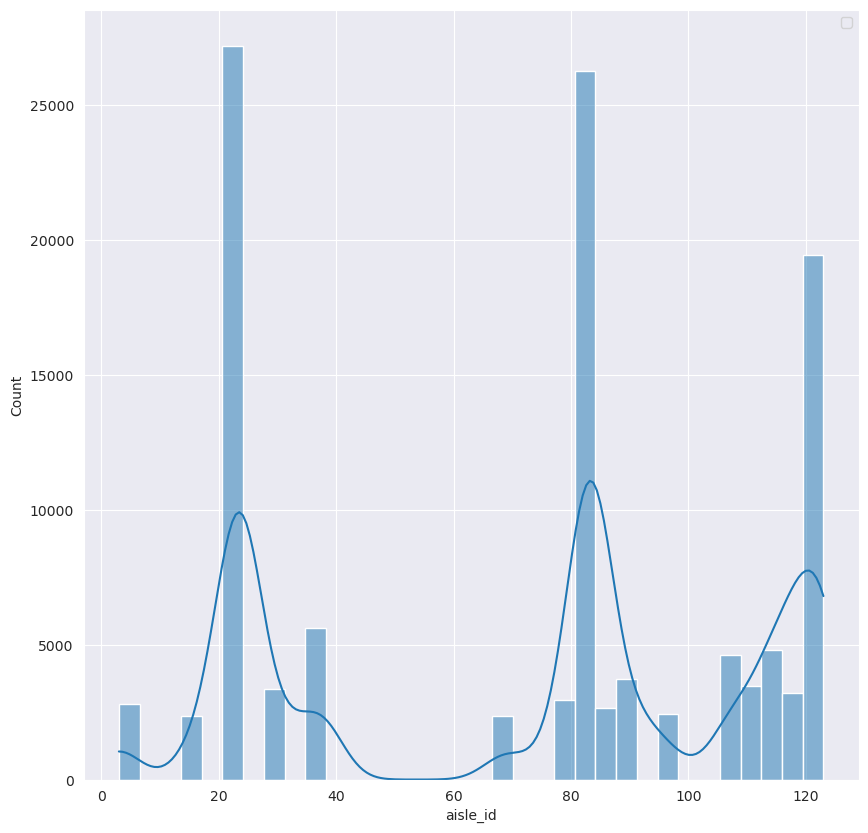

In [284]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.histplot(data=new_df,x="aisle_id",kde=True,ax=ax)
ax.legend()
fig.show()

/tmp/ipykernel_696242/2020433816.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


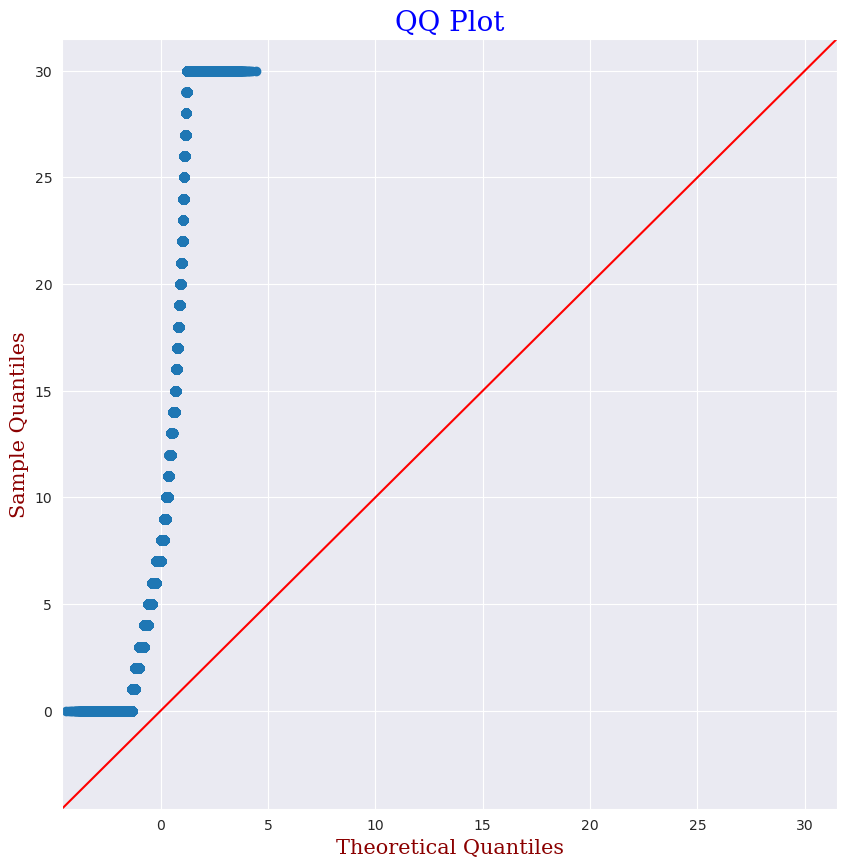

In [267]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a QQ plot
fig,ax = plt.subplots(1,1,figsize=(10,10))
sm.qqplot(df["days_since_prior_order"], line='45',ax=ax)

# Add labels and title
ax.set_title('QQ Plot',fontdict=title_prop)
ax.set_xlabel('Theoretical Quantiles',fontdict=label_prop)
ax.set_ylabel('Sample Quantiles',fontdict=label_prop)

# Show the plot
fig.show()

In [13]:
df_temp = pd.read_csv("data/train_final.csv")

/tmp/ipykernel_696242/3153306541.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


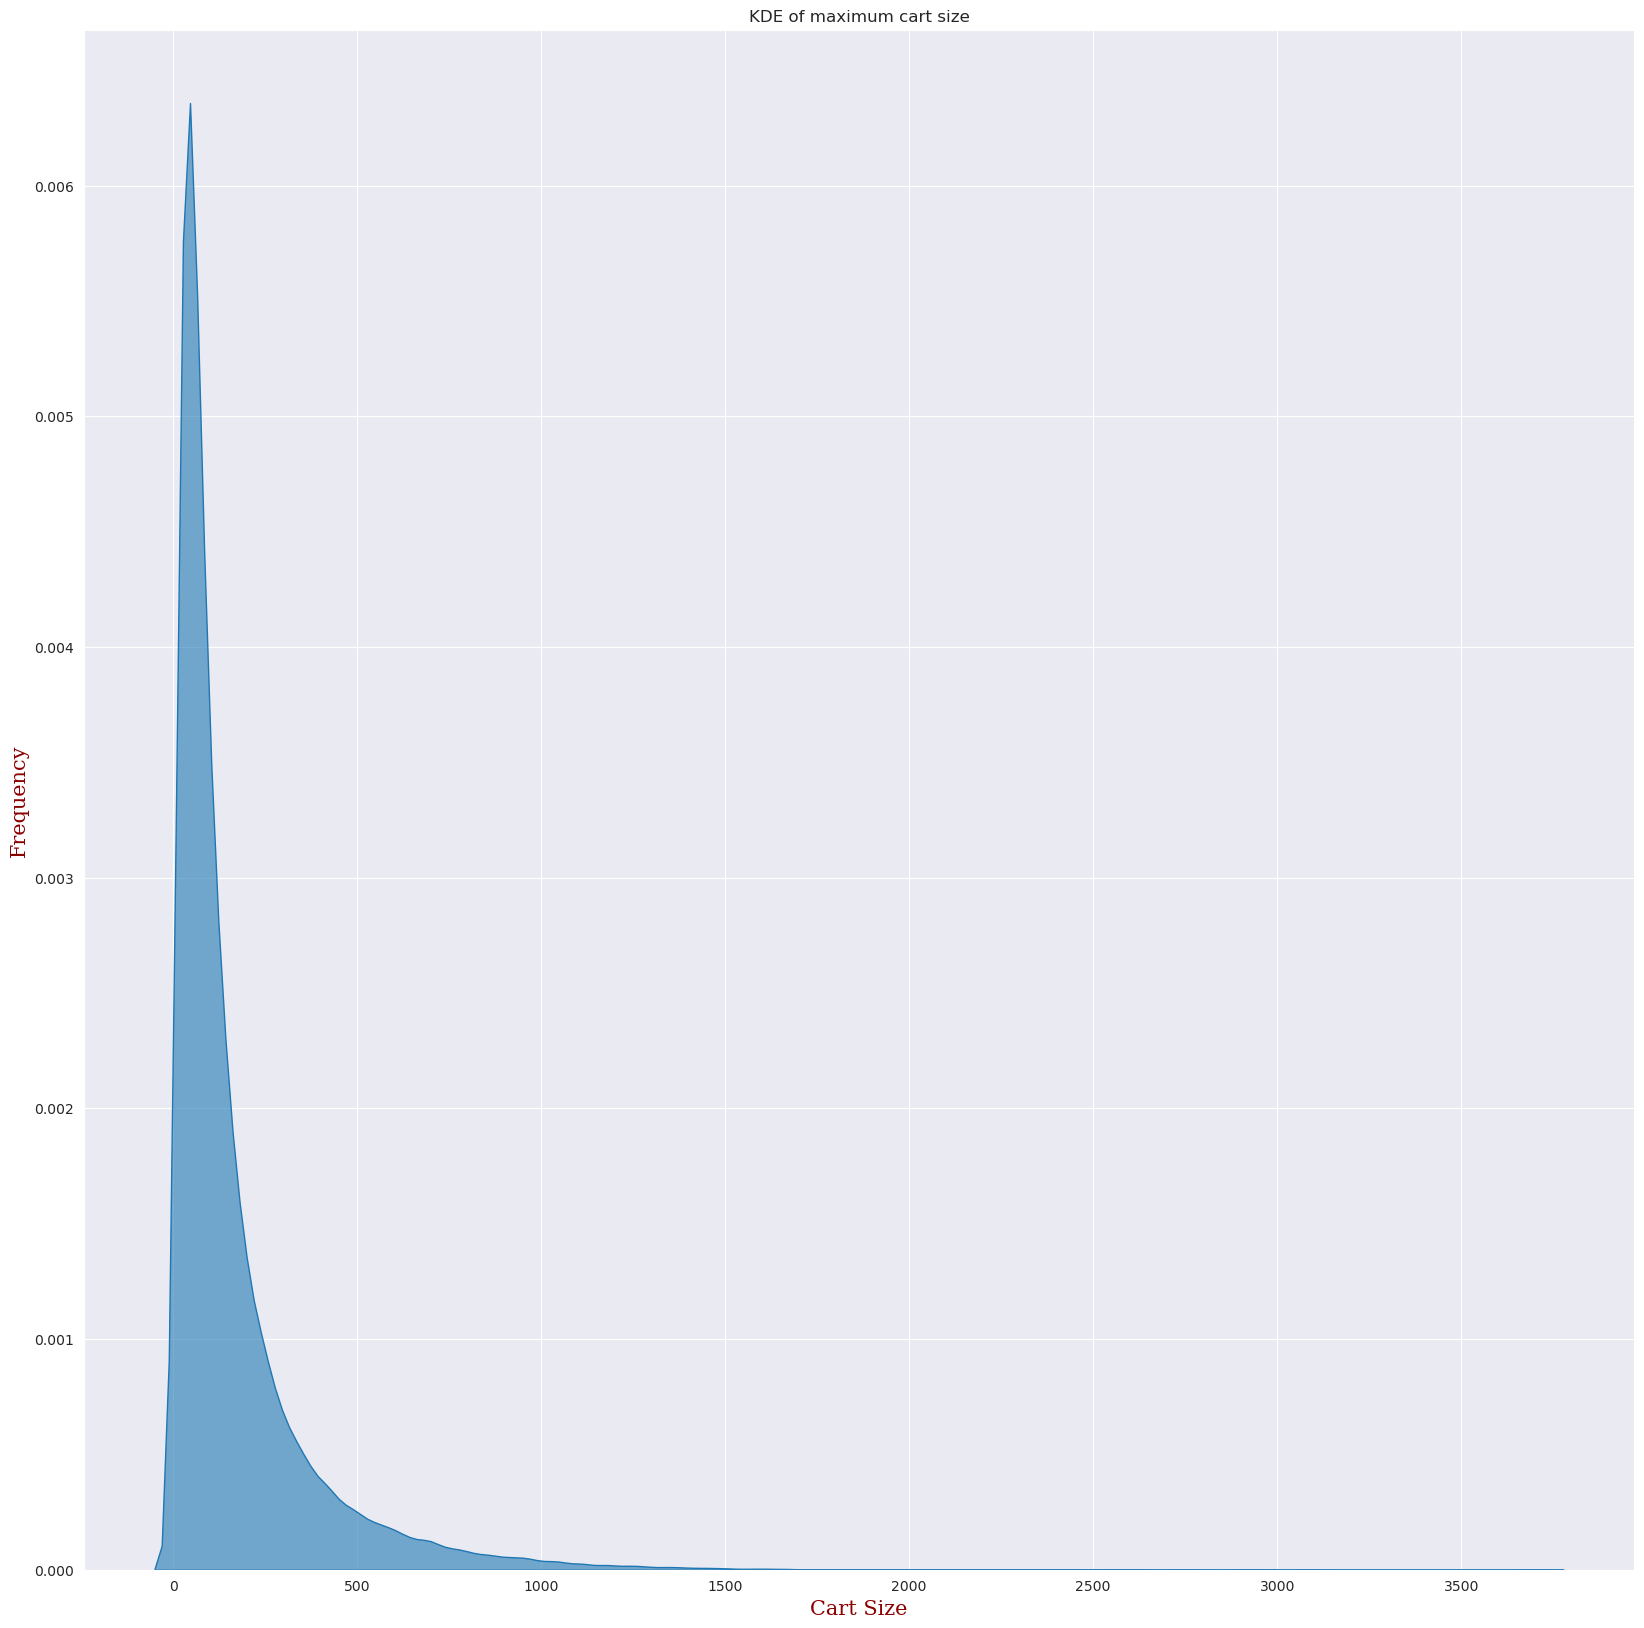

In [304]:

new_df = df_temp["user_id"].value_counts().reset_index()
fig,ax = plt.subplots(1,1,figsize=(20,20))
sns.kdeplot(data=new_df,x="user_id",ax=ax,fill=True,alpha=0.6)
ax.set_xlabel("Cart Size",fontdict=label_prop)
ax.set_ylabel("Frequency",fontdict=label_prop)
ax.set_title("KDE of maximum cart size")
fig.show()

/tmp/ipykernel_696242/1702405554.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


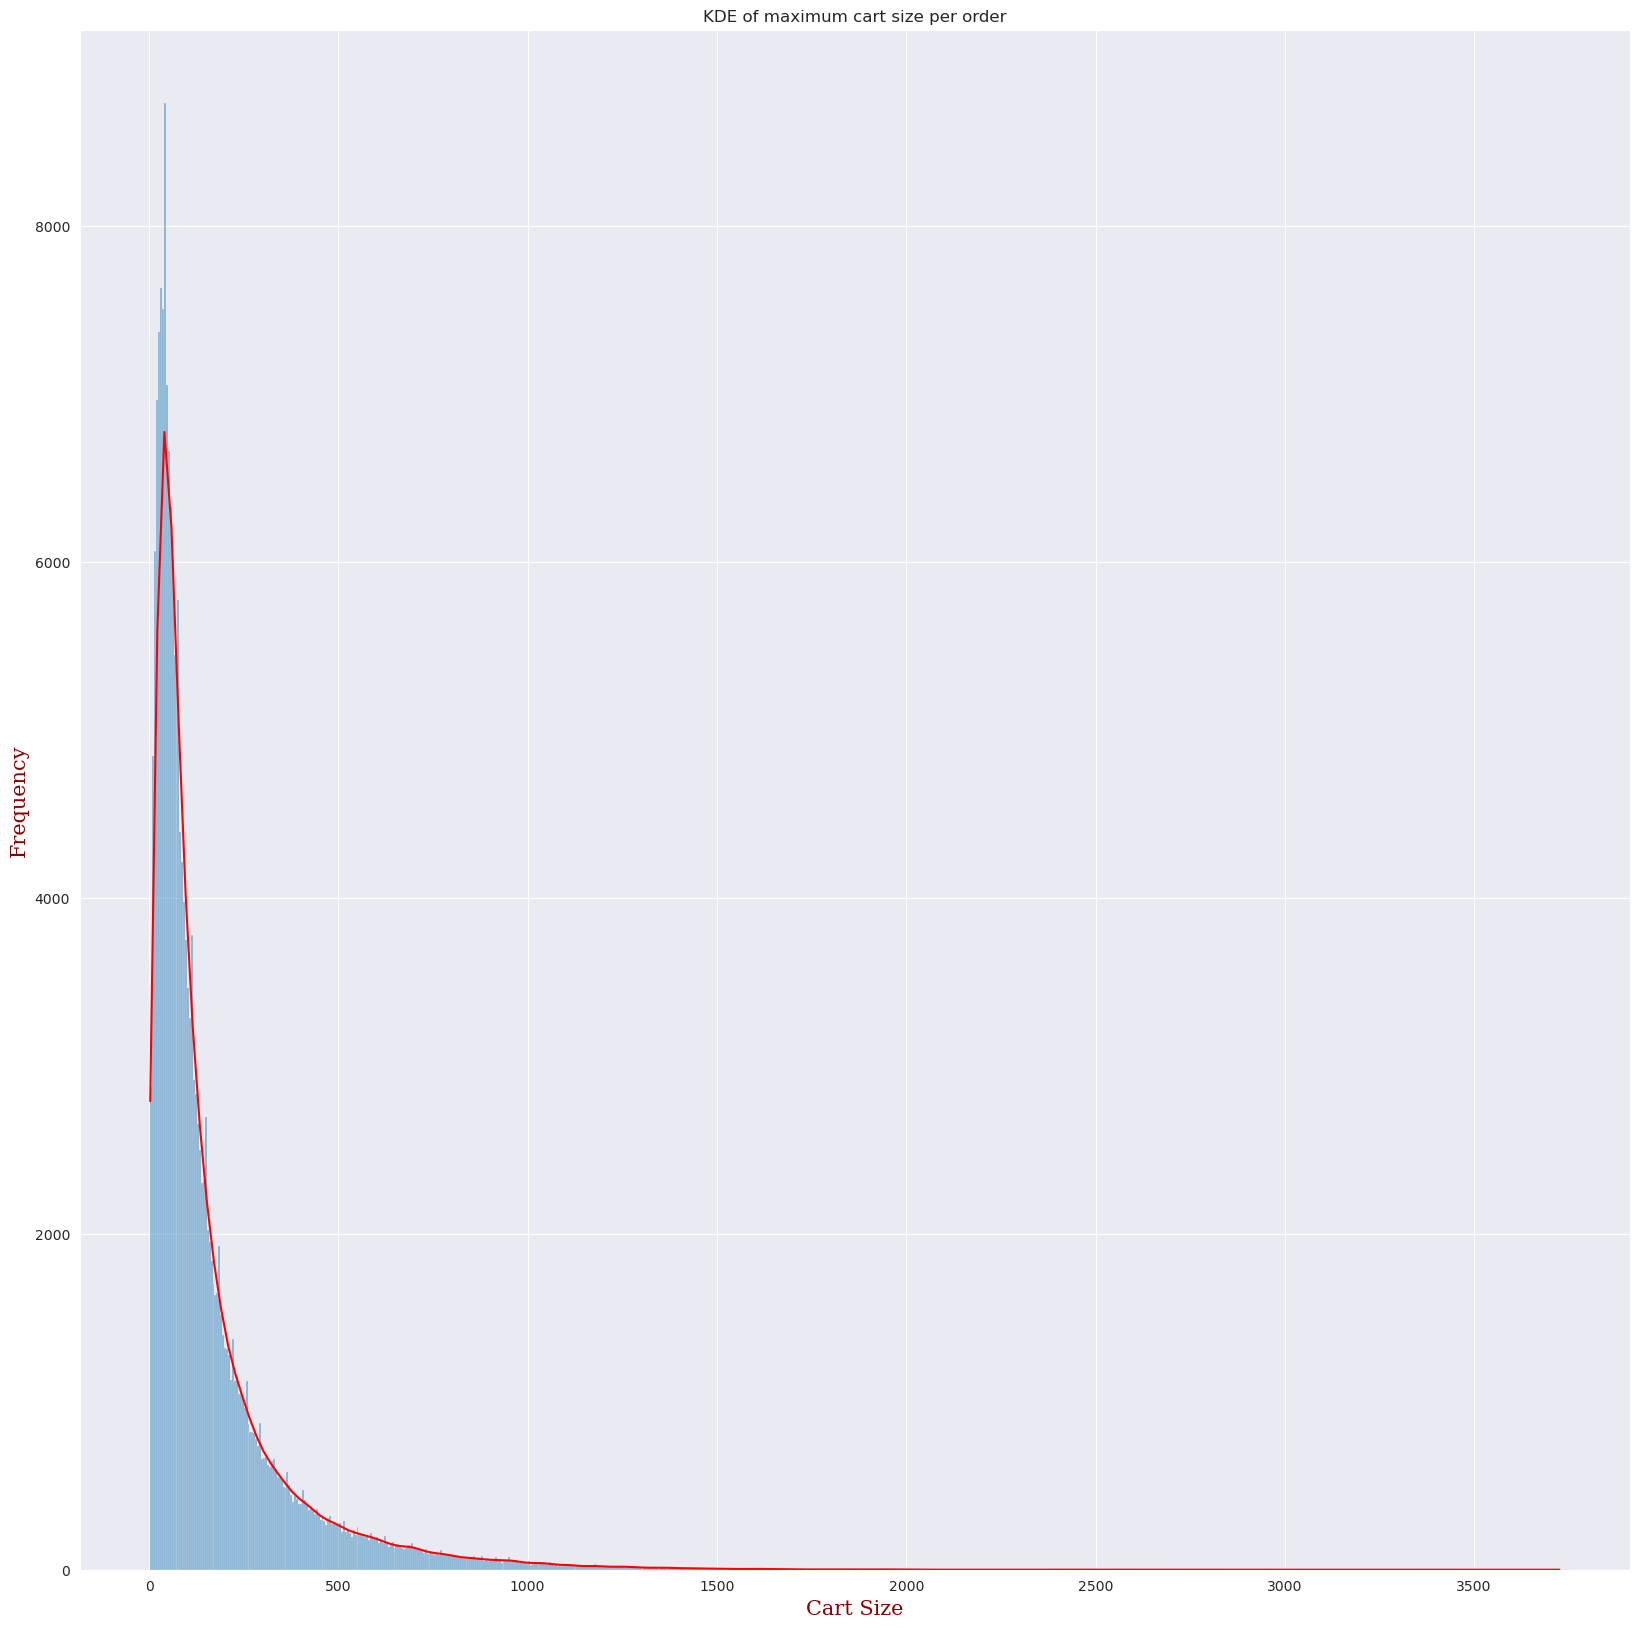

In [320]:
new_df = df_temp["user_id"].value_counts().reset_index()
fig,ax = plt.subplots(1,1,figsize=(20,20))
sns.histplot(data=new_df,x="user_id",kde=True,ax=ax,legend="user_id cart size")
ax.set_xlabel("Cart Size",fontdict=label_prop)
ax.set_ylabel("Frequency",fontdict=label_prop)
ax.set_title("KDE of maximum cart size per order")
ax.lines[0].set_color('r')
fig.show()

In [324]:
df_temp.columns

Index(['Unnamed: 0', 'user_id', 'order_id', 'product_id', 'aisle_id',
       'department_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle', 'department', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

/home/sonu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


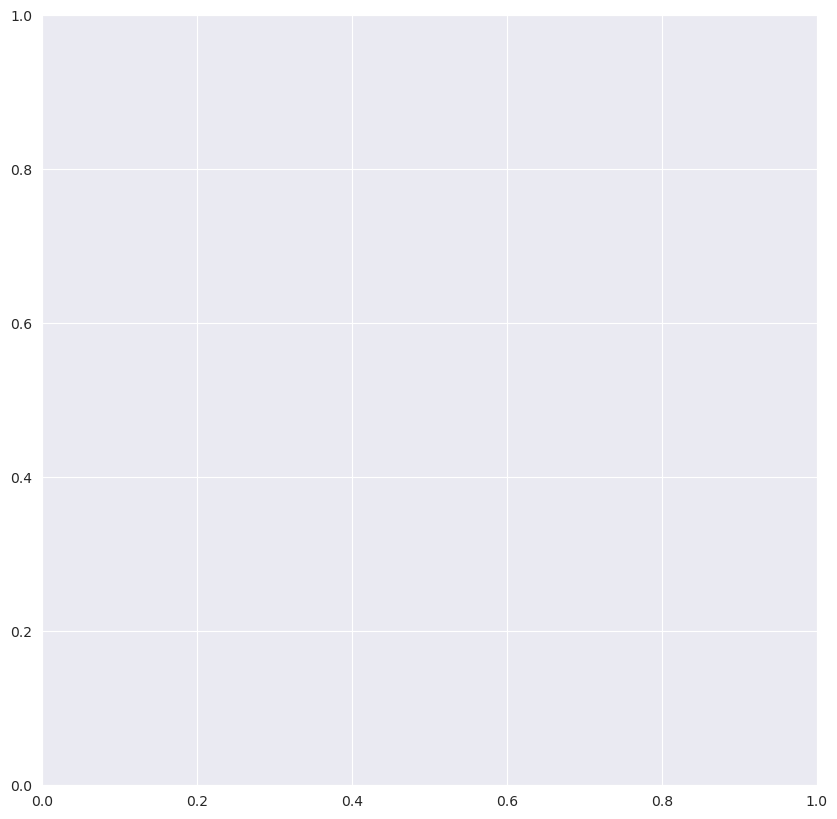

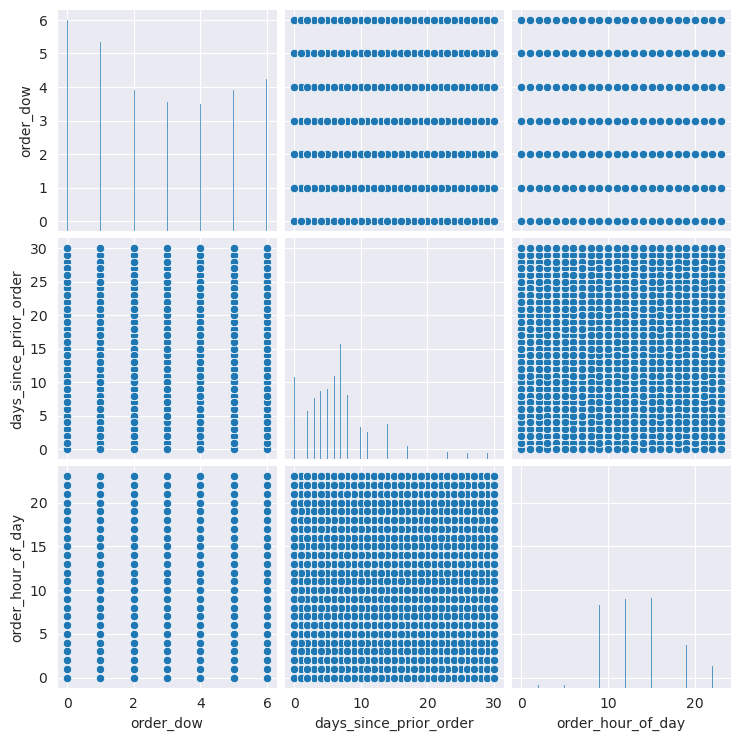

In [326]:
ax = sns.pairplot(data=df_temp[["order_dow","days_since_prior_order","order_hour_of_day"]])

/tmp/ipykernel_770692/1529240482.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


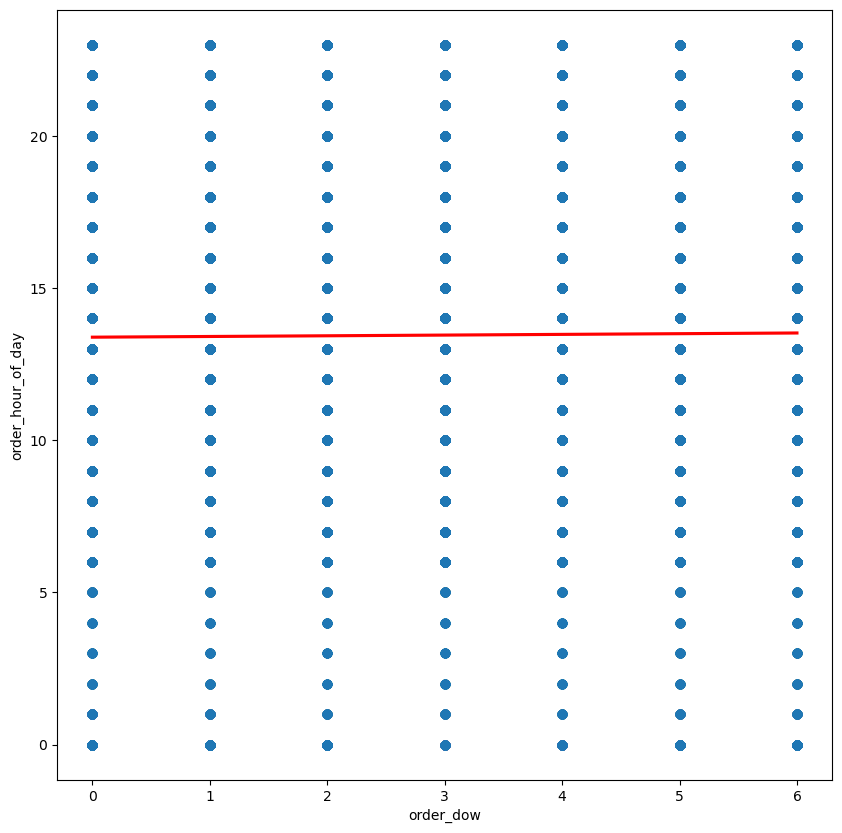

In [6]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(data=df,x = "order_dow",y = "order_hour_of_day",ax=ax)
sns.regplot(data=df,x = "order_dow",y = "order_hour_of_day",line_kws={"color":'r'},ax=ax)
fig.show()

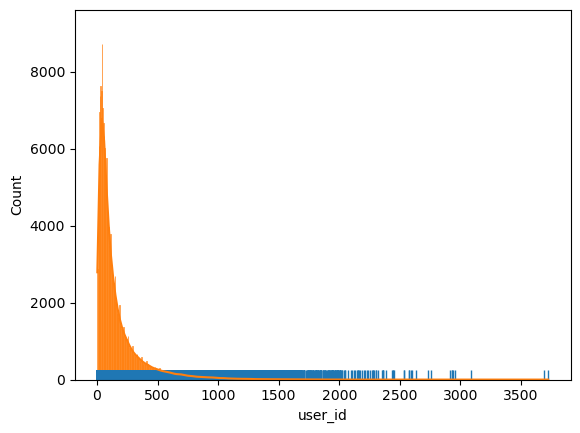

In [18]:
new_df = df_temp["user_id"].value_counts().reset_index()
sns.rugplot(x='user_id', data=new_df)
sns.histplot(data=new_df,x="user_id",kde=True,fill=False)
plt.show()

<Axes: >

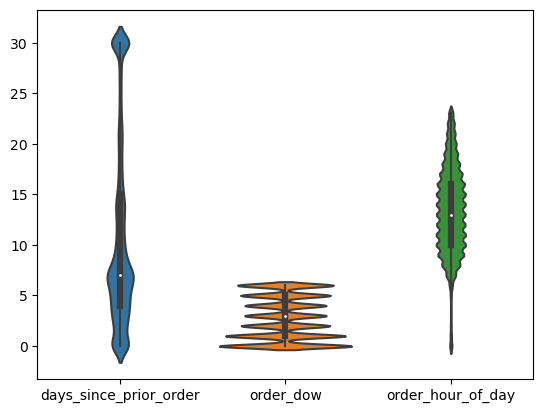

In [21]:
sns.violinplot(data=df[["days_since_prior_order","order_dow","order_hour_of_day"]])

In [26]:
df_temp

,order_dow,order_hour_of_day
0,1,18
1,2,12
2,2,11
3,0,16
4,2,21
...,...,...
199995,4,15
199996,6,21
199997,0,14
199998,3,8


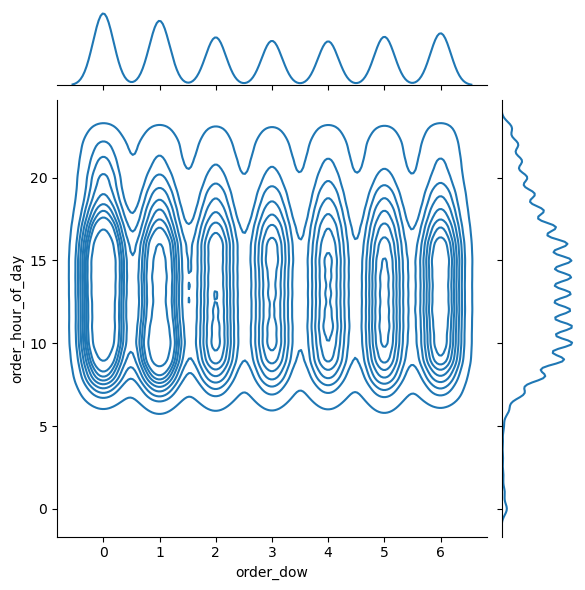

In [28]:
df_temp = df[["order_dow","order_hour_of_day"]]
sns.jointplot(data=df_temp,x="order_dow",y="order_hour_of_day",kind="kde")